### Simple Linear Regression

#### In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [61]:
# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Load the data file
import os
path = 'data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [63]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [64]:

num_of_samples = data.shape[0]
print ('Num of samples: ', num_of_samples)

Num of samples:  97


#### Defining the input and output data

In [65]:
data_x,data_y = data['Population'],data['Profit']

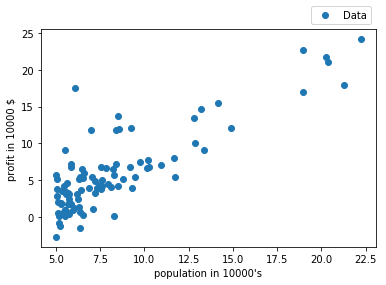

In [68]:
plt.plot(data_x,data_y,'o')
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [70]:

print (data_x[0:5],data_y[0:5])

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64 0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


In [73]:
x = np.array(data_x).reshape(-1, 1)
y = np.array(data_y).reshape(-1, 1)
x_norm_val = np.max(x)
y_norm_val = np.max(y)
x_norm = x/x_norm_val
y_norm = y/y_norm_val

In [75]:
print ('shape: ',x_norm.shape)
print ('input_data: ',x_norm[0:10])

shape:  (97, 1)
input_data:  [[0.27519254]
 [0.24896185]
 [0.38366887]
 [0.31541684]
 [0.26391929]
 [0.37755709]
 [0.33672927]
 [0.38634869]
 [0.29213169]
 [0.22765392]]


In [76]:
print ('shape: ',y_norm.shape)
print ('output_data: ',y_norm[0:10])

shape:  (97, 1)
output_data:  [[0.72853771]
 [0.37810908]
 [0.56578457]
 [0.49090984]
 [0.2825734 ]
 [0.49223506]
 [0.1800762 ]
 [0.49695614]
 [0.27327204]
 [0.1580569 ]]


### Representing model

In [77]:
## Representing model
w = 0
b = 0
x1=x_norm[0]
y_pred = w*x1+b
y1=y_norm[0]
print ('actual value: ',y1)
print('prediction: ',y_pred)
loss = np.power((y1-y_pred),2)
print('loss: ',loss)
#def prediction(w,b,x):
 #   y_pred = np.sum(b,np.multiply(w,x))
  #  return y_pred

#pred = prediction(w,b,xtrain)

actual value:  [0.72853771]
prediction:  [0.]
loss:  [0.53076719]


In [78]:
num_samples = x_norm.shape[0]

def linear_reg_model(w,b,x):
    y_pred = w*x+b
    return y_pred

y_pred = linear_reg_model(w,b,x_norm)

def compute_loss(y,y_pred):  
    #loss = np.power((y-y_pred),2)
    loss = (y-y_pred)**2
    return loss

print ('overall_cost_func:')
mse=0
for i in range(num_samples):
    y_pred = linear_reg_model(w,b,x_norm[i])
    loss = compute_loss(y_norm[i],y_pred)
    #print (loss)
    mse = mse +loss
print ('the mse: ', mse/num_samples)

overall_cost_func:
the mse:  [0.11001189]


#### Gradient Descent Algorithm

In [79]:
##gradient descent
#J(w,b) =𝟏/(𝒎 )(∑_(𝒊=𝟏)^𝒎▒〖(y^𝒊−𝒚_p^𝒊)〗^𝟐
#dw = -2*x1*(y1-y_pred)
#db = -2*(y1-y_pred)
def compute_grad(x,y,y_pred):
    dw = -2*x*(y-y_pred)
    db = -2*(y-y_pred)
    return dw,db


In [80]:
def gradient_descent(X, Y,w_init,b_init, alpha, iters,saving_interval):  
    w=w_init
    b=b_init
    cost = np.zeros(iters)
    w_list=[]
    b_list=[]
    for i in range(iters):
        mse=0
        grad_w=0
        grad_b=0
        for n in range(num_samples):
            y_pred = linear_reg_model(w,b,X[n])
            loss = compute_loss(Y[n],y_pred)
            mse += loss
            dw,db=compute_grad(X[n],Y[n],y_pred)
            grad_w += dw
            grad_b += db            
        grad_w = grad_w/num_samples
        grad_b = grad_b/num_samples
        mse = mse/num_samples
        print('cost: ',mse)
        #print ('weight bias: ',w,b)
        #theta = temp
        cost[i] = mse
        w = w-alpha*grad_w
        b = b-alpha*grad_b
        if i%saving_interval==0:
            w_list.append(w)
            b_list.append(b)
    return w_list,b_list,cost

In [83]:
w_init=0
b_init=0
num_iter=1000
saving_at=100
lr=0.01
w_val,b_val,cost = gradient_descent(x_norm, y_norm,w_init,b_init, lr, num_iter,saving_at)

cost:  [0.11001189]
cost:  [0.10711201]
cost:  [0.10434127]
cost:  [0.10169387]
cost:  [0.09916424]
cost:  [0.09674709]
cost:  [0.09443736]
cost:  [0.0922302]
cost:  [0.09012099]
cost:  [0.08810534]
cost:  [0.08617903]
cost:  [0.08433804]
cost:  [0.08257852]
cost:  [0.08089681]
cost:  [0.07928941]
cost:  [0.07775298]
cost:  [0.07628431]
cost:  [0.07488036]
cost:  [0.07353822]
cost:  [0.0722551]
cost:  [0.07102834]
cost:  [0.06985542]
cost:  [0.06873391]
cost:  [0.0676615]
cost:  [0.06663596]
cost:  [0.06565521]
cost:  [0.06471721]
cost:  [0.06382006]
cost:  [0.0629619]
cost:  [0.06214099]
cost:  [0.06135565]
cost:  [0.06060427]
cost:  [0.05988534]
cost:  [0.05919739]
cost:  [0.05853902]
cost:  [0.05790892]
cost:  [0.0573058]
cost:  [0.05672845]
cost:  [0.05617571]
cost:  [0.05564649]
cost:  [0.05513971]
cost:  [0.05465437]
cost:  [0.0541895]
cost:  [0.0537442]
cost:  [0.05331757]
cost:  [0.05290877]
cost:  [0.05251701]
cost:  [0.05214152]
cost:  [0.05178157]
cost:  [0.05143646]
cost:  

cost:  [0.03484248]
cost:  [0.0348219]
cost:  [0.03480135]
cost:  [0.03478082]
cost:  [0.03476031]
cost:  [0.03473982]
cost:  [0.03471936]
cost:  [0.03469891]
cost:  [0.03467849]
cost:  [0.03465809]
cost:  [0.03463771]
cost:  [0.03461735]
cost:  [0.03459701]
cost:  [0.0345767]
cost:  [0.03455641]
cost:  [0.03453613]
cost:  [0.03451588]
cost:  [0.03449565]
cost:  [0.03447545]
cost:  [0.03445526]
cost:  [0.03443509]
cost:  [0.03441495]
cost:  [0.03439483]
cost:  [0.03437473]
cost:  [0.03435464]
cost:  [0.03433459]
cost:  [0.03431455]
cost:  [0.03429453]
cost:  [0.03427453]
cost:  [0.03425456]
cost:  [0.03423461]
cost:  [0.03421467]
cost:  [0.03419476]
cost:  [0.03417487]
cost:  [0.034155]
cost:  [0.03413515]
cost:  [0.03411533]
cost:  [0.03409552]
cost:  [0.03407574]
cost:  [0.03405597]
cost:  [0.03403623]
cost:  [0.0340165]
cost:  [0.0339968]
cost:  [0.03397712]
cost:  [0.03395746]
cost:  [0.03393782]
cost:  [0.0339182]
cost:  [0.0338986]
cost:  [0.03387903]
cost:  [0.03385947]
cost:  [

cost:  [0.02707961]
cost:  [0.02706724]
cost:  [0.02705487]
cost:  [0.02704252]
cost:  [0.02703018]
cost:  [0.02701786]
cost:  [0.02700554]
cost:  [0.02699324]
cost:  [0.02698096]
cost:  [0.02696868]
cost:  [0.02695642]
cost:  [0.02694417]
cost:  [0.02693194]
cost:  [0.02691972]
cost:  [0.02690751]
cost:  [0.02689531]
cost:  [0.02688313]
cost:  [0.02687096]
cost:  [0.0268588]
cost:  [0.02684666]
cost:  [0.02683452]
cost:  [0.0268224]
cost:  [0.0268103]
cost:  [0.0267982]
cost:  [0.02678612]
cost:  [0.02677406]
cost:  [0.026762]
cost:  [0.02674996]
cost:  [0.02673793]
cost:  [0.02672591]
cost:  [0.02671391]
cost:  [0.02670191]
cost:  [0.02668994]
cost:  [0.02667797]
cost:  [0.02666602]
cost:  [0.02665407]
cost:  [0.02664215]
cost:  [0.02663023]
cost:  [0.02661833]
cost:  [0.02660644]
cost:  [0.02659456]
cost:  [0.02658269]
cost:  [0.02657084]
cost:  [0.026559]
cost:  [0.02654717]
cost:  [0.02653535]
cost:  [0.02652355]
cost:  [0.02651176]
cost:  [0.02649998]
cost:  [0.02648822]
cost:  [

Text(0.5, 1.0, 'Error vs. Training Epoch')

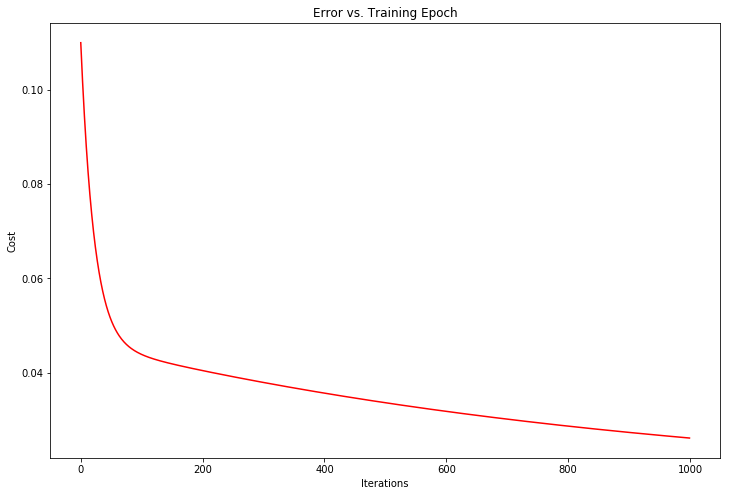

In [84]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(num_iter), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [85]:
print ('before training')
print ('weight:{0} , bias:{1}'.format(w_init,b_init))
print ('after training')
print ('weight:{0} , bias:{1}'.format(w_val[-1],b_val[-1]))

before training
weight:0 , bias:0
after training
weight:[0.46729072] , bias:[0.07635852]


### Prediction after training

In [87]:

#test 
#x_test = np.array(data_x[0:5])
#y_test = np.array(data_y[0:5])
y_test_predicted=x_norm[0:5]*w_val[-1]+b_val[-1]
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_norm[0:5])

predicted_value:  [[0.20495344]
 [0.19269608]
 [0.25564342]
 [0.22374988]
 [0.19968555]]
true_value:  [[0.72853771]
 [0.37810908]
 [0.56578457]
 [0.49090984]
 [0.2825734 ]]


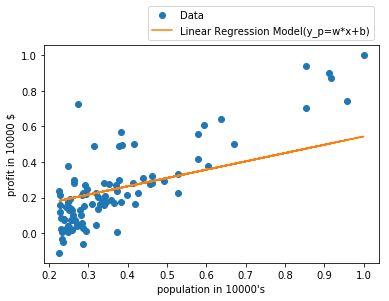

In [88]:
#print ('weight:{0} , bias:{1}'.format(w_val,b_val))
y_test_predicted=x_norm*w_val[-1]+b_val[-1]
plt.plot(x_norm,y_norm,'o', x_norm,y_test_predicted,"-")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data', 'Linear Regression Model(y_p=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

#### Plotting output at intermediate weights

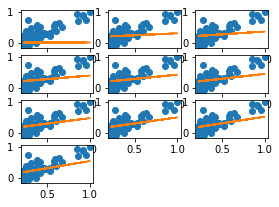

In [89]:
num_cost = int(num_iter/saving_at)
l=5
m=4
l_in=0
m_in=0
x_test=x_norm
y_test=y_norm
for i in range(num_cost):
    y_test_predicted=x_norm*w_val[i]+b_val[i]
    #print (l_in,m_in)
    plt.subplot2grid((l,m),(l_in,m_in))
    plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
    #plt.xlabel("size in sqft")
    #plt.ylabel("price in $")
    m_in+=1
    if m_in==m-1:
        l_in+=1
        m_in=0
    #plt.legend(['Data', 'Linear Regression Model(y_p=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)

plt.show()
